# The Machine Learning Task 

The machine learning task is to use machine learning algorithms and effectively detect and categorize fraudulent transactions. In this project was implemented two algorithms: Logistic Regression and Decision Tree. Among these models, the Decision Tree algorithm emerged as the most accurate, achieving a rate of 100%, followed closely by Logistic Regression at 95.9%. My project seeks to help develop strong fraud detection systems, by enhancing security and trust within financial transactions

# Import all necessary libraries 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import the dataset 

In [5]:
dataset = pd.read_csv('card_transdata.csv')
dataset.head(6)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0


# Total number of rows and columns

In [6]:
dataset.shape

(1000000, 8)

# Data Preprocessing Steps

## Data Overview 

The initial step is to examine the dataset's statistical details, including percentiles, mean, standard deviation, minimum, and maximum. Before importing the essential libraries for the project, we use the "describe()" function to review the dataset.

In [7]:
dataset.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Identify Data Types

Next, let’s determine the type of data in the dataset. The "info()" function provides essential details regarding the dataset.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Data Completeness

The dataset is complete because we have all False for missing data

In [9]:
data_compl = dataset.isnull().any()
print(data_compl)

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
dtype: bool


## Data Uniqueness

The result is False, indicating that the data is unique. 

In [10]:
data_dupl = dataset.duplicated()
print(data_dupl)

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool


## Data Anomaly Detection 

It is essential to check for outliers and eliminate them from the dataset. Outliers found in a classification or regression dataset can lower predictive modeling performance.
Outliers can occur in continuous features like distance_from_home, distance_from_last_transaction, and ratio_to_median_purchase_price. The boxplots will be used to identify them. Boxplots are a commonly used and straightforward technique for detecting outliers.

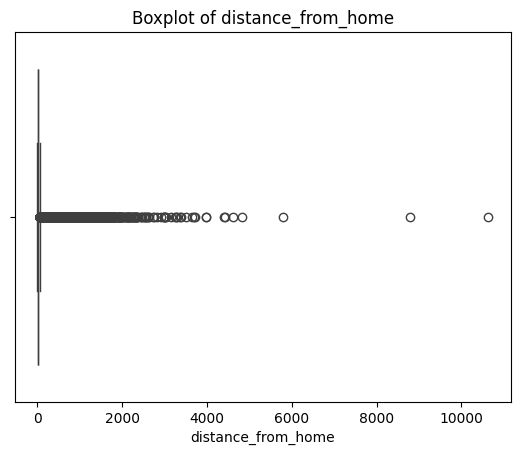

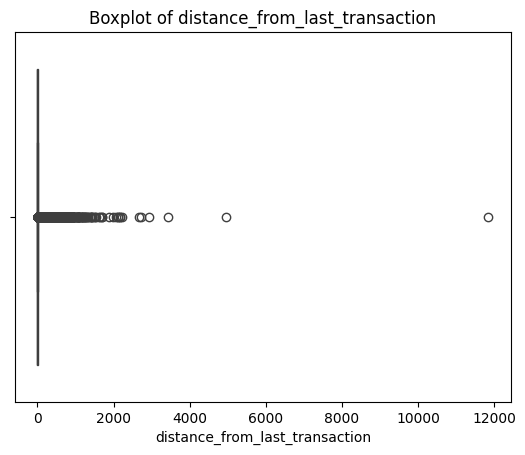

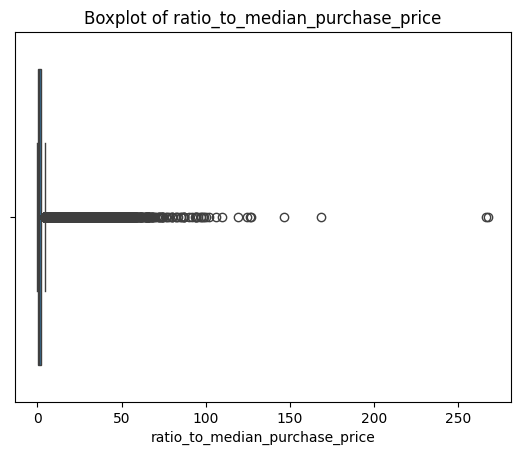

In [11]:
check_outl = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
for feature in check_outl:
    sns.boxplot(x=dataset[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

 **Boxplot of `distance_from_home`**:
There are clear outliers beyond the upper whisker of the boxplot. However, they seem limited in comparison to the main data set, indicating that most of the data is clustered around the lower end of the range. </br>
 **Boxplot of `distance_from_last_transaction`**:
Similarly, outliers are visible, but the main concentration of data is close to the lower end.</br>
 **Boxplot of `ratio_to_median_purchase_price`**:
There are anomalies above 50, with a few reaching over 200. The concentration of these extreme values seems minimal. </br>
Finally, outliers may be disregarded, as a significant portion remains low in quantity across all three variables. 

## Fraud Distribution 

The next step we took was to create a diagram representing the distribution of fraud. The "plt.bar" function from the matplotlib library was used to generate bar charts.

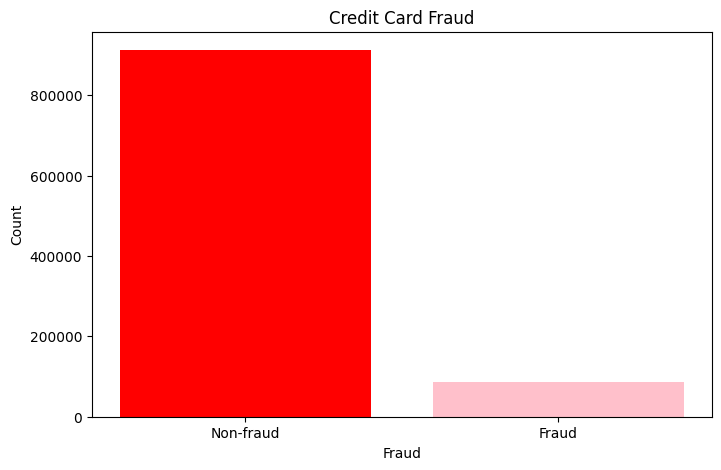

In [12]:
fraud_counts = dataset['fraud'].value_counts()
colors = ['red' if label == 0 else 'pink' for label in fraud_counts.index]

plt.figure(figsize=(8, 5))
plt.bar(fraud_counts.index, fraud_counts.values, color=colors)
plt.title('Credit Card Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-fraud', 'Fraud']) 
plt.show()

The bar chart of credit card fraud shows that the count of fraud (red) is much lower than non-fraud(pink). The dataset is imbalanced, the fraud class significantly outnumbers the other class. This imbalance can lead to several issues, like poor model performance, biased predictions, and misleading evaluation metrics. Consequently, the dataset needs some sampling or balancing methods.

## Fraud by Purchased Method Distribution

The next step is to create bar charts of the distribution of the fraud by the purchased methods('repeat_retailer', 'used_chip', 'used_pin_number', 'online_order')

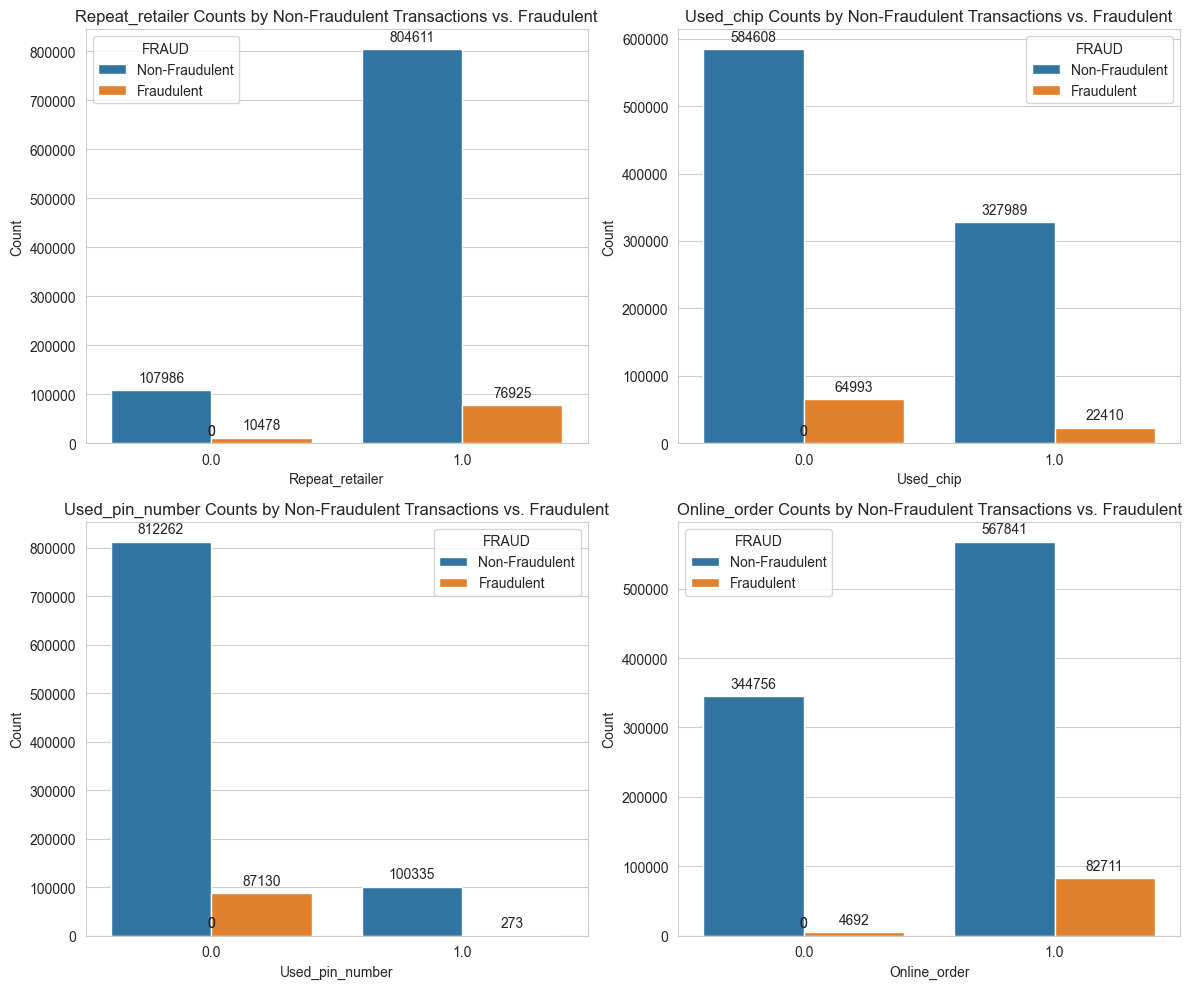

In [13]:
# The style of the seaborn plot
sns.set_style("whitegrid")

categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = sns.countplot(data=dataset, x=feature, hue='fraud', ax=axes[i])
    ax.set_title(f'{feature.capitalize()} Counts by Non-Fraudulent Transactions vs. Fraudulent')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='FRAUD', labels=['Non-Fraudulent', 'Fraudulent'])
    
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9),  # Position of the text above the bar
                    textcoords='offset points')

plt.tight_layout()
plt.show()


Now we can see the distribution of fraud in every purchase methods. 

## Imbalance Handling 

The selected sampling method is the Synthetic Minority Oversampling Technique (SMOTE). The SMOTE function was developed using the imblearn.over_sampling module. The SMOTE is a statistical technique for imbalanced data, it generates synthetic samples for the minority class to balance the class distribution. It takes the samples from the feature spaces. </br>
X is identified as the feature vector, while Y is recognized as the target variable. The dataset is divided into training and testing subsets utilizing "train_test_split()" from the sklearn.model_selection library. The "fit_resample()" creates synthetic samples for the minority class, leading to the resampled feature set (X_resampled) and target variable (y_resampled). 

In [14]:
dataset_encoded = pd.get_dummies(dataset, drop_first=True)
X = dataset_encoded.drop('fraud', axis=1)  
y = dataset_encoded['fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:")
print(dataset['fraud'].value_counts())
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64
Resampled class distribution:
fraud
0.0    730040
1.0    730040
Name: count, dtype: int64


We obtained the resampled class distribution with equal counts for each class, indicating that the SMOTE oversampling method was successful. To visually illustrate the resampled employee attrition, we will employ the same function that we utilized for creating the bar chart. 

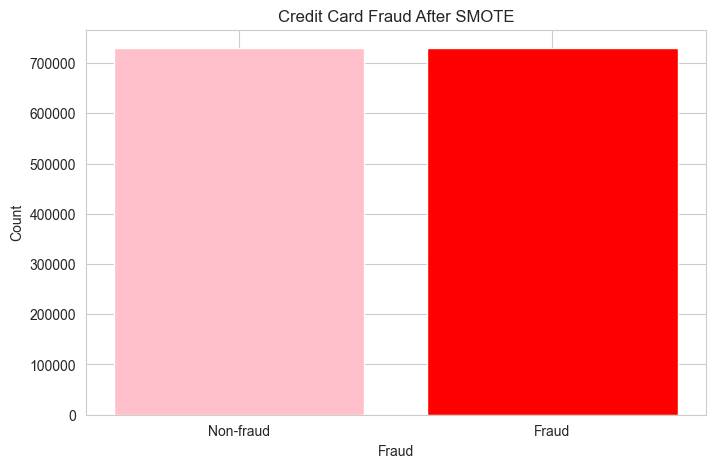

In [15]:
fraud_counts_resampled = y_resampled.value_counts()
plt.figure(figsize=(8, 5))
plt.bar(fraud_counts_resampled.index, fraud_counts_resampled.values, color=['pink', 'red'])
plt.title('Credit Card Fraud After SMOTE')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Non-fraud', 'Fraud'], rotation=0)  
plt.show()

## Feature Engineering 

Feature Engineering is a crucial part of data preparation in Machine Learning. It generates new attributes, which could have greater predictive capability, from the current data to enhance model effectiveness. 

### Distance Ratio 

"distance_from_home" and "distance_from_last_transaction" calculates change in distance from the previous transaction: ratio_distance = distance_from_home/distance_from_last_transaction.

In [16]:
dataset_encoded['ratio_distance'] = dataset_encoded['distance_from_home'] / dataset_encoded['distance_from_last_transaction']
print(dataset_encoded[['ratio_distance', 'distance_from_home', 'distance_from_last_transaction']])

        ratio_distance  distance_from_home  distance_from_last_transaction
0           186.018690           57.877857                        0.311140
1            61.676918           10.829943                        0.175592
2             6.323124            5.091079                        0.805153
3             0.401348            2.247564                        5.600044
4            78.008839           44.190936                        0.566486
...                ...                 ...                             ...
999995       19.592323            2.207101                        0.112651
999996        7.404411           19.872726                        2.683904
999997        1.979278            2.914857                        1.472687
999998       17.596356            4.258729                        0.242023
999999      182.666697           58.108125                        0.318110

[1000000 rows x 3 columns]


# Logistic Regression 

Logistic regression is a linear model used for forecasting binary results. The outcome variable in this model is categorical with two possible outcomes, frequently denoted as True/False or 1/0.

## Model Traning 

In the earlier sections of this project, the following actions were taken:
1. Required Libraries Imported
2. Divided the Dataset into training and testing sets.
3. X was characterized as the feature vector, while Y was identified as the target variable.

With that in mind, we can begin training the model using the Logistic Regression algorithm. Initially, we instantiated the Logistic Regression Model allowing for a maximum of 1000 iterations and executed it using the default hyperparameters. The "fit()" function modifies the model's parameters to optimally align with the data.

In [17]:
logistic_model = LogisticRegression(solver='liblinear', max_iter = 1000)

logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Model Assessment 

The "predict()" method was used to generate the predicted labels, it took the test data as input and returned the predicted values.

In [20]:
y_pred = logistic_model.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

The "predict_proba()" method counts the probabilities in the array form for the target variable in this case. The "where()" function returns the elements based on the condition.

In [22]:
probabilities = logistic_model.predict_proba(X_test)[:, 0]  
rounded_probabilities = np.where(probabilities >= 0.5, 1, 0)
rounded_probabilities

array([1, 1, 1, ..., 0, 1, 1])

In [24]:
pos_probabilities = logistic_model.predict_proba(X_test)[:,1]
rounded_pos_probabilities = np.where(pos_probabilities >= 0.5, 1, 0)
rounded_pos_probabilities

array([0, 0, 0, ..., 1, 0, 0])

##  Module Evaluation Metrics

Accuracy is a straightforward and intuitive metric that measures how often the model correctly predicts the classes compared to the total number of predictions. 

This function calculates the accuracy of the model's predictions, by comparing the true values (y_test) with the predicted values (y_pred_test). y_test represents the actual class labels, while y_pred_test represents the predicted class labels obtained from the test dataset. 

In [26]:
y_pred_test = logistic_model.predict(X_test)
print('The accuracy score of the testing set: {0:0.3f}'.format(accuracy_score(y_test, y_pred_test)))

The accuracy score of the testing set: 0.959


After, we compared the training and testing sets. The trained logistic regression model made predictions on the training dataset (X_train), and after the predicted labels were stored in the variable y_pred_train

In [27]:
y_pred_train = logistic_model.predict(X_train)

print('The accuracy score of the trainig set: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train)))

The accuracy score of the trainig set: 0.959


Finally, the accuracy score of the testing set is 95.9% and for the training set is 95.9% too. 

# Decision Tree 

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

## Model Training 

In the earlier sections of this project, the following actions were taken:
1. Required Libraries Imported
2. Divided the Dataset into training and testing sets.
3. X was characterized as the feature vector, while Y was identified as the target variable.

Now, we can begin training the model using the Decision Tree algorithm. The "fit()" function modifies the model's parameters to optimally align with the data.

In [19]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model Assesment 

The "predict()" method was used to generate the predicted labels, it took the test data as input and returned the predicted values.

In [28]:
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_tree

array([0., 0., 0., ..., 1., 0., 0.])

The "predict_proba()" method counts the probabilities in the array form for the target variable in this case. The "where()" function returns the elements based on the condition.

In [29]:
probabilities_tree = decision_tree_model.predict_proba(X_test)[:, 0]  
rounded_probabilities_tree = np.where(probabilities_tree >= 0.5, 1, 0)
rounded_probabilities_tree

array([1, 1, 1, ..., 0, 1, 1])

In [30]:
pos_probabilities_tree = decision_tree_model.predict_proba(X_test)[:,1]
rounded_pos_probabilities_tree = np.where(pos_probabilities_tree >= 0.5, 1, 0)
rounded_pos_probabilities_tree

array([0, 0, 0, ..., 1, 0, 0])

## Module Evaluation Metrics

Accuracy is a straightforward and intuitive metric that measures how often the model correctly predicts the classes compared to the total number of predictions. 

This function computes the accuracy of the model's predictions by contrasting the true values (y_test) with the predicted values (y_pred_test). Here, y_test indicates the actual class labels, whereas y_pred_test denotes the predicted class labels derived from the test dataset. 



In [38]:
y_pred_test_tree = decision_tree_model.predict(X_test)
print('The accuracy score of the testing set: {0:0.3f}'.format(accuracy_score(y_test, y_pred_test_tree)))

The accuracy score of the testing set: 1.000


In [36]:
y_pred_train_tree = decision_tree_model.predict(X_train)
print('The accuracy score of the trainig set: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train_tree)))

The accuracy score of the trainig set: 1.000


Finally, the accuracy score of the testing set is 100% and for the training set is 100% too.

# Conclusion 

The main aim of this project was to accurately identify and classify fraudulent transactions using machine learning algorithms. In this project, two algorithms were used: Logistic Regression and Decision Tree. Among these models, the Decision Tree algorithm exhibited the greatest accuracy, reaching a flawless classification rate of 100%, whereas Logistic Regression with an accuracy of 95.9%. The project effectively achieved its goal of implementing machine learning methods to boost fraud detection systems, leading to increased security and confidence in financial transactions through these outcomes.